In [1]:
using LinearAlgebra
using RDatasets
using GLM
using Pkg
using CSV
using DataFrames
using Plots
using Pkg
using Distributions
using StatsBase
using RData
using Random

include("glm_impl.jl");


**The Method of Maximum Likelihood**

Once we move beyond Linear Models, we will require a broader set of tools to fit these models. The most common of these is the method of Maximum Likelihood. Let $y_1 \ldots y_n$ be independent and identically distributed from density $f$, which we will assume is twice differentiable for reasons we will see short. 

Under these circumstances, the probability of the data points $y_1 \ldots y_n$ is given by $$L(\theta; y) = P(y_1, \ldots y_n) = \prod_{i=1}^{n}f(y_i; \theta)$$ 

We use the independence assumption here to multiply the probabilities. $L$ in this case denotes the likelihood of seeing data $y_1, \ldots y_n$ given the parameters $\theta$. If we want to estimate the parameters $\theta$, the parameters that are most likely the true population parameters intuitively should be the parameters that maximize the likelihood; given the data we have, the true parameters most likely produce the data distribution. 

In practice, we will use the log-likelihood. 

$$l(\theta; y) = \log L(\theta; y) = \log( \prod_{i=1}^{n}f(y_i; \theta)) = \sum_{i=1}^{n}\log f(y_i; \theta)$$

where we have used the fact that $\log(a \cdot b) = \log(a) + \log(b)$. Now, for a number of reasons, we prefer using the log-likelihood, rather than the likelihood. 

From a practical, computing perspective, we are working with probabilities, which are necessarily between 0 and 1. Computers can only represent numbers using a finite number of digits, and multiplying many small numbers together will eventually force the number to be too small to be represented, and make it 0, which destroys the computation. Now, with log-likelihood, we can sum instead, which does not result in this problem. We can do this, since the $\theta$ that maximizes the log-likelihood also maximizes the likelihood, and we are interested in the value of $\theta$, not the value of likelihood at its maximum. 

*Least Squares as a special case of Maximum Likelihood

Maximum Likelihood has a number of special properties, one of which is that Least Squares is actually a special case of Maximum Likelihood when the errors are distributed normally. 

Let $y_i \sim \mathcal{N}(X \beta, \sigma^2)$, where $X\beta$ is our normal linear regression model with $p$ parameters. 

\begin{align*}
    l(y; X, \beta) &= \sum_{i=1}^{n}\log f(y_i; \theta) \\ 
    &= \sum_{i=1}^{n}\log \left ( \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(- \frac{(y_i - x_i \beta)^2}{2 \sigma^2} \right ) \\
    &= \sum_{i=1}^{n}\log \left ( \frac{1}{\sqrt{2 \pi \sigma^2}} \right ) + \log \left (\exp(- \frac{(y_i - x_i \beta)^2}{2 \sigma^2} \right ) \\ 
    &= \sum_{i=1}^{n}\log \left ( \frac{1}{\sqrt{2 \pi \sigma^2}} \right ) - \frac{(y_i - x_i \beta)^2}{2 \sigma^2} \\
\end{align*}

The second line follows because the data has mean $X\beta$ and variance $\sigma^2$. In the third line, we use the property that the $\log (AB) = \log(A) + \log(B).$ 

Now our goal is to maximize $l$. Note that  $\log \left ( \frac{1}{\sqrt{2 \pi \sigma^2}} \right )$ does not affect the sum, so we can drop the term. Thus, our problem reduces to 
 \begin{equation*}
   \hat \beta = \arg \max_{\beta}( - \frac{(y_i - x_i \beta)^2}{2 \sigma^2})
\end{equation*}

Again, the $2 \sigma^2$ do not affect the computation, and we can drop that as well. Finally, we have a negative sign in front of the maximization. Since $(y_i - x_i \beta)^2$ is squared, it is always non-negative, and we can convert maximizing a negative quantity into minimizing the non-negated quantity. Thus our final problem is: 

\begin{equation*}
   \hat \beta = \arg \min_{\beta}[(y_i - x_i \beta)^2]
\end{equation*}

which is identical to minimizing $\Vert y - X \beta \rVert_2$, our least squares problem. 

Thus, under the assumption that our errors are normally distributed with fixed variance, Maximum Likelihood is the same as Least Squares estimation. 

**Generalized Linear Models**

*The GLM Framework*

In a linear model, we assume that $\mathbb{E}(Y | X) = \mu(X) = X \beta$ and $Y | X \sim \mathcal{N}(\mu(X), \sigma^2I)$. The first assumption assumes the conditional expectation of $Y$ given any specific value $X$ is linear in parameters $\beta_0, \ldots \beta_p$. The second states that the residuals are distributed normally with mean 0 and variance $\sigma^2$. 

This is a pretty restrictive model, and while we can introduce many transformations of the data to make it work somewhat, fundamentally at a certain point we would prefer a more flexible model, and that is exactly what the Generalized Linear Model framework provides. 

The GLM model consists of: 
Link: the connection between the covariates $X$ and the random output $y$. Intuitively, in  $\mu(X) = f(X\beta)$, the link is $f$. However, statisticians generally prefer $g(\mu(X)) = X \beta$, and it is $g$ that is properly described as the link function. However, $f = g^{-1}$, so this mostly a question of notation. 
Random Component: We will require $Y \sim $ Exp(x; $\theta$), where Exp denotes the Exponential Family, a set of broad probability distributions that includes many well-known probability distributions. 
\end{enumerate}

**The Exponential Family**

If we had any probability distribution of $x$ and $\theta$, essentially the role restriction on $p(x; \theta)$ is that the integral or sum is 1. This allows for arbitrarily complex interactions between $x$ and $\theta$ that makes the problem very difficult. 

To handle this, the exponential family restricts the probability distribution to: 

$$p(x; \theta) = \exp(\theta \cdot x) f(x) g(\theta)  $$

In other words, the only interaction between the $\theta$ and $x$ parameters occurs inside the exp function via an inner product, and we also have additional functions $f, g$ that solely depend on $x$ or solely depend on $\theta$.  

There are multiple characterizations of the exponential family, which primarily vary by whether $\theta$ is inside or outside the exponential. Define $c(\theta) = 1 / g(\theta)$. Then $c(\theta) = \exp(\log(c(\theta))$, so we can combine terms and get $$p(x; \theta) = f(x) \exp(\theta \cdot x + \log(c(\theta)) = f(x) exp(\theta \cdot x - \log(g(\theta))$$ 

In particular, we can think of $g(\theta)$ or whatever the function of $\theta$ is denoted as as a normalizing function that guarantees the integral or sum is always 1. 


**The Canonical exponential family** 

The structure of a Generalized linear Model.
$$
P(y ; \theta, \phi)=a(y, \theta) \exp \left ( \frac{y\theta -k(\theta)}{\phi} \right )
$$
$\theta$ is the canonical parameter. $k(\theta)$, sometimes $b(\theta)$ is the cumulent function.
$a(y, \theta)$ is the normalizing function.

The normal distribution can also be expressed in canonical form: 


$$
\begin{aligned}
P\left(y ; \theta, \sigma^{2}\right) &=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left\{-\frac{(y-\mu)^{2}}{2 \sigma^{2}}\right\} \\
&=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left\{-\frac{\left(y^{2}-2 y \mu+\mu^{2}\right)}{2 \sigma^{2}}\right\} \\
&=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left\{\frac{y^{2}}{2 \sigma^{2}}+\frac{y \mu}{\sigma^{2}}-\frac{\mu^{2}}{2 \sigma^{2}}\right\} \\
&=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(\frac{y^{2}}{2 \sigma^{2}}\right) \exp \left(\frac{y \mu}{\sigma^{2}}-\frac{\left(\frac{\mu^{2}}{2}\right)}{\sigma^{2}}\right) \\
\text { Let a }(y, \theta) &=\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(\frac{y^{2}}{2 \sigma^{2}}\right), \phi=\sigma^{2}, \theta=\mu, k(\theta)=\left(\frac{\mu^{2}}{2}\right)
\end{aligned}
$$

The Poisson distribution can also be expressed in canonical form: 
$$
\begin{aligned}
P(y; \mu) &=\frac{\exp (-\mu) \mu^{y}}{y !} \\
&=\frac{\exp (-\mu) \exp \left(\log \mu^{y}\right.}{\exp (\log (y !))} \\
&=\frac{\exp (-\mu) \exp (y \log \mu)}{\exp (\log (y !))} \\
&=\exp (-\mu+y \log \mu-\log y !) \\
&=[\exp (\log (y !))]^{-1} \exp (y \log \mu-\mu) \\
& a(y, \mu)=\frac{1}{y !} \quad \theta =\log \mu \quad k(\theta)=\mu, \phi=1
\end{aligned}
$$


Recall the Moment Generating Function:
$$
\begin{aligned}
M(t)=E\left(e^{t x}\right) &=\int_{S} e^{t x} p(y) d y \text { if } y \text { continuous } \\
&=\sum_{S} e^{t^{x}} p(y) \text { if } y \text { discrete }
\end{aligned}
$$
Define the Cumulent Generating function as:
$$
k(t)=\log M(t)
$$

Using the change of variables $\theta^{'} = \theta + t \phi$, we can compute the MGF of a Canonical Exponential Family: 


$$
\begin{aligned}
M_{t}(x) &=\int_{s} \exp \left(t y\right) a(y, \phi) \exp \left[\frac{y \theta-k(\theta)}{\phi}\right]  \\
&=\int_{s} a(y, \phi) \exp \left(\frac{t y \phi+y \theta-k(\theta)}{\beta}\right) d y \\
&=\int_{s} a(y, \phi) \exp \left[\frac{\operatorname{ty} \phi+k\left(\theta^{\prime}\right)-k\left(\theta^{\prime}\right)+y \theta-k(\theta)}{\phi}\right] d y \\
&=\exp \left(\frac{k(\theta')-k(\theta)}{\phi}\right) \int_{s} a(y, \phi) \exp \left[\frac{\operatorname{ty} \phi+y \theta-k(\theta')}{\phi}\right] d y \\
&=\exp \left(\frac{k\left(\theta^{\prime}\right)-k(\theta)}{\phi}\right) \int_{s} a(y, \phi) \exp \left[\frac{y(t \phi+\theta)-k\left(\theta^{\prime}\right)}{\phi}\right] d y \\
&=\exp \left(\frac{k\left(\theta^{\prime}\right)-k(\theta)}{\phi}\right) \int_{s} a(y, \phi) \exp \left(\frac{y \theta^{\prime}-k\left(\theta^{\prime}\right)}{\phi}\right) d y
\end{aligned}
$$
The integral integrates to 1 since it is a EDM with $\theta=\theta^{\prime}$.
$$
\begin{aligned}
&M_{t}(x)=\exp \left(\frac{k\left(\theta^{\prime}\right)-k(\theta)}{\phi}\right) \\
&k_{t}(x)=\frac{k\left(\theta^{\prime}\right)-k(\theta)}{\phi}
\end{aligned}
$$


Now we derive properties of the Cumulent Generating Function, $k(x)$. 
$$
\begin{aligned}
&\text { claim: } \left.k^{\prime}(t)\right|_{t=0}=\mu,\left.k^{2}\right|_{t=0}=\sigma^{2} \text {. }\\
&\text { Proof. }\\
&K^{\prime}(t)=\frac{d}{d t}(\log M(t))\\
&\begin{aligned}
K^{\prime}(t) &=\frac{d}{d t}(\log M(t)) \\
&=\frac{1}{M(t)} \cdot M^{\prime}(t) \\
\left.K^{\prime}(t)\right|_{t=0} &=\left.\frac{1}{M(0)} \cdot M^{\prime}(t)\right|_{t=0}
\end{aligned}\\
&\begin{aligned}
\left.K^{\prime}(t)\right|_{t=0} &=\frac{1}{M(0)} \cdot M^{\prime}(t) |_{t=0} \\
&=1 \cdot M^{\prime}(t) |_{t=0} \\
&=E(X) \\
K^{\prime \prime}(t) &=\frac{d}{d t}\left(\frac{1}{M(t)} \cdot M^{\prime}(t)\right) \\
&=\frac{1}{M(t)} \cdot M^{\prime \prime}(t)+M^{\prime}(t) \cdot\left(\frac{(M(t)) \cdot \sigma-1 \cdot M^{\prime}(t)}{(M(t))^{2}}\right)^{2}
\end{aligned}\\
&K^{\prime \prime}(t)=\frac{M^{\prime \prime}(t)}{M(t)}-\left(\frac{M^{\prime}(t)}{H(t)}\right)^{2}\\
&K^{\prime \prime}(t)=\frac{\left.M^{\prime \prime}(t)\right|_{t=0}}{1}-\frac{\left(\left.M^{\prime}(t)\right|_{t=0}\right)^{2}}{1}\\
&=E\left(X^{2}\right)-(E X)^{2}\\
&=\operatorname{Var}(x)
\end{aligned}
$$


The Cumulent Generating Function of a Normal Distribution: 
$$
\begin{aligned}
k(\theta)=\frac{\mu^{2}}{2} \phi &=\sigma^{2} \\
k(t) &=\frac{k(\theta+t \phi)-k(\theta)}{\phi} \\
&=\frac{\left(\mu+t \sigma^{2}\right)^{2}-\frac{\mu^{2}}{2 \sigma^{2}}}{2 \sigma^{6}} \\
&=\frac{x^{2}+2 \mu t \sigma^{2}+t^{2} \sigma^{4}-x^{2}}{2 \sigma^{2}} \\
&=\frac{2 \mu t \sigma^{2}+t^{2} \sigma^{4}}{2 \sigma^{2}} \\
&=\frac{2 \mu t+t^{2} \sigma^{2}}{2} \\
&=\frac{\mu t+\sigma^{2} t^{2}}{2}
\end{aligned}
$$

$$
\begin{aligned}
\left.\rightarrow K^{\prime}(t)\right|_{t=0} &=\mu+\left.\frac{2 t \cdot \sigma^{2}}{2}\right|_{t=0} \\
&=\mu+0 \\
&=\mu
\end{aligned}
$$
$$
\begin{aligned}
K^{\prime \prime}(t) &=0+\frac{2 \sigma^{2}}{2} \\
&=\sigma^{2}
\end{aligned}
$$
$$
K^{\prime \prime}(t)=0+\frac{2 \sigma^{2}}{2}
$$
as expected.




**The Fisher Scoring Algorithm**

The goal of Maximum Likelihood is to maximize $l(y; \theta)$. From Calculus, we know this occurs when $ \frac{\partial l}{\partial \theta} = 0$. To simplify notation, let $V(\theta) =\frac{\partial l}{\partial \theta}$. Generally speaking, we will not be able to analytically solve these problems using Calculus: instead, we will be using iterative numerical optimization algorithms, of which the Fisher Scoring Algorithm is a well-known example. 

Consider a Taylor Series approximation of $V(\theta)$ about an initial guess $\theta_0$: 

$V(\theta) \approx V(\theta_0) - J(\theta_0) (\theta - \theta_0)$, where $J$ is the Hessian matrix of the log-likelihood. 

Now set $\theta = \theta^{*}$, the optimal value of parameters. 

\begin{align*}
    V(\theta^{*}) &\approx V(\theta_0) - J(\theta^{*}) (\theta^{*} - \theta_0) \\
    0 &\approx V(\theta_0) - J(\theta_0) (\theta^{*}) + J(\theta^{*}) \theta_0 \\ 
    J(\theta_0) (\theta^{*}) &\approx V(\theta_0) + J(\theta^{*}) \theta_0 \\ 
    \theta^{*} &\approx V(\theta_0) J(\theta_0)^{-1} + J(\theta_0)^{-1} J(\theta^{*}) \theta_0 \\ 
    \theta^{*} &\approx V(\theta_0) J(\theta_0)^{-1} + \theta_0 \\ 
\end{align*}

where in the second equation,  $ V(\theta^{*}) = 0$ since at the optimum, $V$, the derivative of the log-likelihood, is 0.

Thus, we have the following algorithm: 

\begin{equation*}
    \theta_{m+1} = \theta_m + J(\theta_{m})^{-1} V(\theta_m)
\end{equation*}

In practice, it turns out the Fisher Information, $I(\theta) = \mathbb{E}[J(\theta)]$ is easier to work with, and thus the practicable algorithm is 

\begin{equation*}
    \theta_{m+1} = \theta_m + I(\theta_{m})^{-1} V(\theta_m)
\end{equation*}


**The Iterated Reweighted Least Squares Algorithm**


Suppose $f: \mathbb{R}^{m} \rightarrow \mathbb{R}$ is $C^{2}$.

Define $\nabla_{f}=\left[\begin{array}{c}\frac{\partial f}{\partial x_{1}} \\ \frac{\partial f}{\partial x_{m}}\end{array}\right] \in \mathbb{R}^{m}$

Define $\left(H_{f}\right)_{i j}=\frac{\partial^{2} f}{\partial x_{i} \partial x_{j}}, H \in \mathbb{R}^{m \times m}$

For smooth functions, H is symmetric. If $f$ is strictly concave, then $H_{f}(x)$ is negative definite:
$$
x^{\top} H_{f}\left(x_{0}\right) x<0 \quad \forall x
$$

Call $x \mapsto H_{f}(x)$ the Hessian map.

Suppose $f$ has a continuous Hessian map at $x_{0}$.


$$
\begin{aligned}
&f(x) \approx f\left(x_{0}\right)+\nabla_{f}^{\top}\left(x_{0}\right)\left(x-x_{0}\right)+\frac{1}{2}\left(x-x_{0}\right)^{\top} H_{f}\left(x_{0}\right)\left(x-x_{0}\right) \\
&\in \mathbb{R} \\
&\in \mathbb{R}^{m}
\end{aligned}
$$


The following approximates the gradient:
$$
\nabla_{f}(x) \approx \nabla_{f}\left(x_{0}\right)+H_{f}\left(x_{0}\right)\left(x-x_{0}\right)
$$


**Iteratively re-weighted Least Squares:**
$$
\begin{aligned}
&l_{n}=\sum_{i=1}^{n} \frac{\gamma_{i}\left(\theta_{i}-b\left(\theta_{i}\right)\right.}{\phi}+c\left(Y_{i} ; \phi\right) \\
&E\left(Y_{i}\right)=f_{i}=b^{\prime}\left(\theta_{i}\right) \quad g\left(\mu_{i}\right)=X_{i}^{\top} \beta \\
&\theta_{i}=h(x \beta)=\left(b^{\prime}\right)^{-1} \circ g^{-1}\left(x^{\top} \beta\right)
\end{aligned}
$$


$$
\begin{aligned}
\frac{\partial l_{n}}{\partial \beta_{i}} &=\sum_{i=1}^{n} \frac{\partial l_{i}}{\partial \theta_{i}} \cdot \frac{\partial \theta_{i}}{\partial \beta_{j}} \\
&=\sum_{i=1}^{n} \frac{Y_{i}-b^{\prime}\left(\theta_{i}\right)}{\phi} \cdot \frac{\partial \theta_{i}}{\partial \beta_{j}} \\
&=\sum_{i=1}^{n} \frac{Y_{i}-b^{\prime}\left(\theta_{i}\right)}{\phi} h^{\prime}\left(x_{i} \beta\right) \cdot x_{i}^{(j)} \text { since } \frac{d}{d \theta_{j}} x_{i} \beta=\frac{d}{d \theta}\left(x_{i}^{(1)} \beta_{1}+\ldots x_{i}^{(i)} \beta_{j}+\ldots x_{i}^{(n)} \beta_{n}\right)=x_{i}^{(j)} \\
&=\sum_{i=1}^{n} g^{\prime}\left(\mu_{i}\right)\left[Y_{i}-b^{\prime}\left(\theta_{i}\right)\right] \frac{h^{\prime}\left(x_{i} \beta\right) \cdot x_{i}^{(j)}}{g^{\prime}\left(\mu_{i}\right) \cdot \phi} \\
&=\sum_{i=1}^{n} g^{\prime}\left(\mu_{i}\right)\left[Y_{i}-\mu_{i}\right] \cdot \frac{h^{\prime}\left(x_{i} \beta\right) \cdot x_{i}^{(j)}}{g^{\prime}\left(\mu_{i}\right) \cdot \phi} \\
&\text { Define } \widetilde{Y}_{i}=g^{\prime}\left(\mu_{i}\right) Y_{i} \quad \tilde{\mu}_{i}=g^{\prime}\left(\mu_{i}\right) \mu_{i} \quad \omega_{i}=\frac{h^{\prime}\left(x_{i} \beta\right)}{g^{\prime}\left(\mu_{i}\right) \phi} \\
&=\sum_{i=1}^{n}\left(\tilde{Y}_{i}-\tilde{H}_{i}\right) \omega_{i} x_{i}^{(j)} \\
\end{aligned}
$$
In Matrix form, we have:
$$
\begin{aligned}
l_{n}(\beta) &=x^{\top} w(\tilde{Y}-\tilde{\mu}) \quad x \in \mathbb{R}^{n \mu p} \\
\frac{\partial^{2} l_{n}}{\partial \beta_{j} \partial \beta_{k}} &=\frac{\partial}{\partial \beta_{k}}\left[\sum_{i=1}^{n} \frac{Y_{i}-\mu_{i}}{\phi} h^{\prime}\left(x_{\beta}\right) x_{i}^{(j)}\right] \\
&=\sum_{i=1}^{n} \frac{\partial}{\partial \beta_{k}}\left(\frac{Y_{i}-\mu_{i}}{\phi} h^{\prime}\left(x_{\beta}\right) x_{i}^{(j)}\right) \\
&=\sum_{i=1}^{n} \frac{Y_{i}-\mu_{i}}{\phi} \cdot \frac{\partial}{\partial \beta_{k}}\left(h^{\prime}\left(x_{\beta}\right) x_{i}^{(j)}\right)+h^{\prime}(x \beta) x_{i}^{(j)} \cdot \frac{\partial}{\partial \beta}\left(\frac{\gamma_{i}-\mu_{i}}{\phi}\right) \\
&=\sum_{i=1}^{n} \frac{Y_{i}-\mu_{i}}{\phi} h^{\prime \prime}(x \beta) \cdot x_{i}^{(k)} x_{i}^{j}+h^{\prime}(x \beta) x_{i}^{(j)} \cdot-\frac{1}{\phi} \cdot \frac{\partial}{\partial \beta_{k}}\left(\mu_{i}\right) \text { since } \frac{r_{i}}{\phi} \text { does not depend on } \theta \\
\frac{\partial_{\mu i}}{\partial \beta_{k}}\left(\mu_{i}\right) &=\frac{\partial b^{\prime}\left(\theta_{i}\right)}{\partial \beta_{k}}=\frac{\partial b^{\prime}\left(h\left(x_{i}^{\top} \beta\right)\right)}{\partial \beta_{k}}=b^{\prime \prime}\left(h\left(x_{i}^{\top} \beta\right)\right) \cdot h^{\prime}\left(x_{i}^{\top} \beta\right) \cdot x_{i}^{(k)} \\
&=b^{k}\left(\theta_{i}\right) h^{\prime}\left(x_{i}^{\top} B\right) \cdot x_{i}^{(\alpha)}
\end{aligned}
$$

Thus:
$$
\begin{aligned}
\frac{\partial^{2} \ln }{\partial \beta_{j} \partial \beta_{k}}=\sum_{i=1}^{n} \frac{x_{i}-\mu_{i}}{\phi} h^{\prime \prime}(x \beta) \cdot x_{i}^{(k)} x_{i}^{j}+h^{\prime}(x \beta) x_{i}^{(j)} \cdot-\frac{1}{\phi} \cdot\left(b^{x}\left(\theta_{i}\right) h^{\prime}\left(x_{i}^{\top} \beta\right) \cdot x_{i}^{(\alpha)}\right) \\
\end{aligned}
$$
$$
\begin{aligned}
E\left(\frac{\partial^{2} l_{n}}{\partial \beta_{j} \partial \beta_{k}} \mid x_{1 . . x_{N}}\right)=& E\left(\sum_{i=1}^{n} h^{\prime}\left(x_{\beta}\right) x_{i}^{(j)} \cdot-\frac{1}{\phi} \cdot\left(b^{x}\left(\theta_{i}\right) h^{\prime}\left(x_{i}^{\top} \beta\right) \cdot x_{i}^{(k)}\right) x_{1} \ldots x_{N}\right) \\
&+E\left(\sum_{i=1}^{n} \frac{r_{i}-\mu_{i}}{\phi} h^{\prime \prime}(x \beta) \cdot x_{i}^{(k)} x_{i}^{j}\right)
\end{aligned}
$$
The first term is deterministic.
Since $E\left(Y_{i}-H_{i} \mid x_{1}, X_{N}\right)=0$, the second ferm is 0 .
$$
\begin{aligned}
E\left(\frac{\partial^{2} \ln _{n}}{\partial \beta_{j} \partial \beta_{k}} \mid x_{1}, x_{N}\right) &=\sum_{i=1}^{n} h^{\prime}(x \beta) x_{i}^{(j)} \cdot-\frac{1}{\phi} \cdot\left(b^{x}\left(\theta_{i}\right) h^{\prime}\left(x_{i}^{\top} \beta\right) \cdot x_{i}^{(\alpha)}\right.\\
&=-\frac{1}{\phi} \sum_{i=1}^{n} b^{\prime \prime}\left(\theta_{i}\right)\left[h^{\prime}\left(x_{i}^{\top} \beta\right)\right]^{2} x_{i}^{(j)} x_{i}^{(k)}
\end{aligned}
$$
$$
E\left(H_{l_{n}}(\beta)\right)=-\frac{1}{\phi} \sum_{i=1}^{n} b^{\prime \prime}\left(\emptyset_{i}\right)\left[h^{\prime}\left(x_{i}^{\top} \beta\right)\right]^{2} x_{i} x_{i}^{\top}
$$
Recall $h=\left(b^{\prime}\right)^{-1} g^{-1} \Leftrightarrow b^{\prime} \circ h=b^{\prime} \circ\left(b^{\prime}\right)^{-1} g^{-1} \Leftrightarrow b^{\prime} \circ h=g^{-1}$
$$
\left(g^{-1}\right)^{\prime}=\left(b^{\prime} \circ h\right)^{\prime}=\left(b^{\prime}(h)\right)^{\prime}=b^{\prime \prime}(h) \cdot b^{\prime}=b^{\prime \prime} \circ h \circ h^{\prime}
$$
Re-writing:
$$
\begin{aligned}
b^{\prime \prime} \circ h \circ h^{\prime} &=\left(g^{\prime \prime}\right)^{\prime} \\
&=\frac{1}{g^{\prime} \cdot g^{-1}} \quad \text { which follows from the derivative of an inverse function. }
\end{aligned}
$$
Now recall $\theta_{i}=h\left(x_{i}^{\top} \beta\right)$ and $\mu_{i}=g^{-1}\left(x_{i}^{\top} \beta\right)$
$$
b^{\prime \prime} \circ h\left(x_{i}^{\top} \beta\right) h^{\prime}\left(x_{i}^{\top} \beta\right)=b^{\prime \prime}\left(\theta_{i}\right) \cdot h^{\prime}\left(x_{i}^{\top} \beta\right)=\frac{1}{g^{\prime} \cdot g^{-1}\left(x_{i}^{\top} \beta\right)}=\frac{1}{g^{\prime}\left(\mu_{i}\right)}
$$

So what was originally
$$
\begin{aligned}
E\left(H_{l_{n}}(\beta)\right) &=-\frac{1}{\phi} \sum_{i=1}^{n} b^{\prime \prime}\left(\theta_{i}\right)\left[h^{\prime}\left(x_{i}^{\top} \beta\right)\right]^{2} x_{i} x_{i}^{\top} \\
&=-\frac{1}{\phi} \sum_{i=1}^{n} \frac{1}{g^{\prime}\left(H_{i}\right)} h^{\prime}\left(x_{i}^{\top} \beta\right) x_{i} x_{i}^{\top}
\end{aligned}
$$
Again define $w=\left[\begin{array}{lll}w_{1} & & \\ & \ddots & \\ & & w_{n}\end{array}\right]$
where $w_{i}=\frac{h^{\prime}\left(X_{i}^{\top} \beta\right)}{g^{\prime}\left(H_{i}\right) \cdot \phi} \quad$ Recall if canonical, $h=i$ dentity, $h^{\prime}=1$
$$
I(\beta)=-E\left(H_{R_{n}}(\beta)\right)=X^{\top} W X
$$
Now recall Fisher's Algorithm and Newton-Raphson:
$$
\begin{aligned}
x^{(k+1)} &=x^{(k)}-H_{f}\left(x^{(k)}\right)^{-1} \nabla_{f}\left(x_{k}\right) \quad(\text { Newton-Raphson }) \\
& \approx x^{k}+I\left(\theta_{k}\right)^{-1} \nabla_{l_{n}}\left(\theta^{(k)}\right)
\end{aligned}
$$
Now in our case,
$$
\begin{aligned}
&\nabla_{l_{n}}=X^{\top} W(\tilde{Y}-\tilde{\mu}) \\
&I\left(\theta_{K}\right)=X^{\top} W X
\end{aligned}
$$
$$
\begin{aligned}
\beta^{(x+1)}=\beta^{(k)}+&\left(x^{\top} \omega x\right)^{-1} x^{\top} \omega(\tilde{Y}-\tilde{\mu}) \\
&\left(X^{\top} X\right)^{-1} X^{\top} y \quad \text { normal equations }
\end{aligned}
$$
This is why it is called iteratively re-weighted.

If $w=I_{d}$ and $Y_{z} \bar{Y}(k)-\tilde{\mu}(k)$
$$
=Y^{(k)} g^{\prime}\left(\mu^{(k)}\right)-\mu^{(k)} g^{-1}\left(\mu^{(k)}\right)
$$
we could use Least Squares


Consider $y=x \beta+\varepsilon, \varepsilon \sim N\left(0, w^{-1}\right)$
Denoity of $Y_{n} N_{p}\left(X \beta, \omega^{-1}\right)$
$$
\left(\frac{1}{\operatorname{dat}\left(\omega^{-1}\right)} 2 \pi\right)^{p / 2} \exp \left[\frac{(Y-x \beta)^{\top} \omega(r-x \beta)}{2}\right]
$$
As a sanity cheok, if $\operatorname{dim} p=1$ :
$\omega^{-1}=\sigma^{2}$, so $\operatorname{det}\left(w^{-1}\right)=\sigma^{2}, \quad w=\left(w^{-1}\right)^{-1}=\frac{1}{\sigma^{2}}$, so
$\frac{1}{\left(\sigma^{2} 2 \pi\right)^{1 / 2}} \exp \left(\frac{\left(r-X_{\beta}\right)(Y-X \beta)}{2 \sigma^{2}}\right)$, the normal distribution.
$\min _{\beta}(\gamma-x \beta)^{\top}(y-x \beta)$


Let $w=\sqrt{w} \cdot \sqrt{w}$ since $w=\left(\begin{array}{ll}w_{1} & \ddots \\ & w_{N}\end{array}\right)$ is diagonal
$$
\min _{\beta}(Y-X \beta)^{\top}(Y-X \beta)=\min _{\beta}(\sqrt{\omega} \gamma-\sqrt{\omega} X \beta)^{\top}(\sqrt{w} Y-\sqrt{w} \times \beta)
$$
Let $Y^{\prime}=\sqrt{w} Y, \quad X^{\prime}=\sqrt{w} X$
We have: $\min _{\beta}\left(Y^{\prime}-x^{\prime} \beta\right)^{\top}\left(Y^{\prime}-x^{\prime} \beta\right)$ Which is a Least Squares problem with solution.:
$$
\left(x^{\prime \top} x^{\prime}\right)^{-1} x^{\prime \top} y^{\prime}
$$
Substituting: $\left((\sqrt{w} x)^{\top} \sqrt{w} x\right)^{-1}(\sqrt{w} x)^{\top}(\sqrt{w} y)$
$$
\begin{aligned}
&=\left(x^{\top} \sqrt{w} \sqrt{w} x\right)^{-1} x^{\top} \sqrt{w} \sqrt{w} Y \\
&=\left(x^{\top} w x\right)^{-1} x^{\top} w Y
\end{aligned}
$$
The glm function in $R$ uses IRLS



### Preprocess Data

In [2]:
function encode_gender(gender)
    if gender == "M"
        return 0
    elseif gender == "F"
        return 1
    end
end;

In [3]:
df = dataset("mlmRev", "Chem97")

gender_feature = encode_gender.(df[:, "Gender"])
data_matrix = df[:, filter(x -> x ∈ ["Age", "GCSEScore"], names(df))]
X = Matrix(data_matrix)
X = hcat(X,gender_feature)

y = df[:, :Score];

## Basic Linear Model

In [4]:
β = X \ y # [Age, GCSEScore, GCSECnt, Gender]

3-element Vector{Float64}:
 -0.008923685903726846
  0.993141407759757
 -0.5458351940454096

## Generalized Linear Model

In [5]:
gm1 = fit(GeneralizedLinearModel, @formula(Score ~ Age + GCSEScore + Gender), df, Poisson())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Poisson{Float64}, LogLink}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Score ~ 1 + Age + GCSEScore + Gender

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -1.42574     0.0203308   -70.13    <1e-99  -1.46559     -1.38589
Age          -0.00673722  0.00068891   -9.78    <1e-21  -0.00808745  -0.00538698
GCSEScore     0.501184    0.00308302  162.56    <1e-99   0.495141     0.507227
Gender: F    -0.120287    0.00479321  -25.10    <1e-99  -0.129681    -0.110892
────────────────────────────────────────────────────────────────────────────────

## IRLS Implementation

In [6]:
function wls_solve(w, F, b) 
    # Computes min_x ||WAX - b||_2^2 assuming W diagonal Matrix represented as vector
    # F is the SVD representation of A matrix. 

    z = F.U' * b   
    y = z ./ (w[1:length(F.S)] .* F.S)
    return F.V * y 
end;

In [7]:
function irls(X, y, assume_stable=false, method="poisson", test_beta=Float64[], alpha = 0.95)
    # set assume_stable = true if problem is well-conditioned. 
    # assume_stable = true will solve via LU decomposition 
    # Otherwise, use stable but slower SVD decomposition
    
    # Requires: method be `poisson` or `gamma`
    
    m, n = size(X)
    @assert m >= n "GLMs require n > p"
    X = hcat(ones(m), X)

    β_k = zeros(n+1) 
    
    cur_diff = 1e32
    ϵ_machine = 1e-15

    if assume_stable == false
        F = svd(X)
    end
   
    # Does not affect estimation of $\hat{\beta}$
    ϕ = 1
    # g = x -> log(x)
    if method == "poisson"
        g_prime = x -> 1 / x
        g_inverse = x -> exp(x)
    else
        g_prime = x -> 1 / (x^2)
        g_inverse = x -> -x 
    end 
       
    
    μ_k = g_inverse.(X * β_k)  
    w_k = 1 ./ (g_prime.(μ_k) .* ϕ)
    
    differences = []
    
    while cur_diff > ϵ_machine 
        μ_k = g_inverse.(X * β_k)  
        w_k = 1 ./ (g_prime.(μ_k) .* ϕ)
        
        if assume_stable
            W_k = Diagonal(w_k)
        end
        
        y_primek = g_prime.(μ_k) .* y 
        μ_primek = g_prime.(μ_k) .* μ_k
        
        # Naively: new_β = β_k + inv(X' * W_k * X) * X' * W_k * (y_primek - μ_primek)
        if assume_stable
            new_β = β_k + X' * W_k * X \ X' * (W_k * (y_primek - μ_primek))
        else
            new_β = β_k + wls_solve(w_k, F, Diagonal(w_k) * (y_primek - μ_primek))
        end 
        
        cur_diff = norm(new_β - β_k)
        push!(differences, cur_diff)
        β_k = new_β
    end 
    
    # Implement Wald test
    if length(test_beta) > 0
        # Fisher Information 
        I_info = X' * Diagonal(w_k) * X 
        display(I_info)
        
        # m used here, as it is number of examples
        W = m * (β_k - test_beta)' * I_info * (β_k - test_beta) 
        println(W)
        # W converges in distribution to chi_squared with df = p (need to count intercept)  
        # Compute qchisq(df=p) in R
        test_value = cquantile(Chisq(n + 1), alpha)
        if W > test_value
            println("test beta is rejected at alpha = 0.95")
        else
            println("test beta is not rejected at alpha = 0.95")
        end
    end 
    
    return differences, β_k
    
end;

In [8]:
@time differences, β_k = irls(X, y, true,  "poisson", [-0.07; -.04
;0.3; -0.16])
β_k

4×4 Matrix{Float64}:
 180318.0        -85626.0         1.19298e6   80904.0
 -85626.0             2.15304e6  -5.42731e5  -38135.4
      1.19298e6      -5.42731e5   8.00082e6       5.46046e5
  80904.0        -38135.4         5.46046e5   80904.0

2.285135339633036e8
test beta is rejected at alpha = 0.95
  2.526566 seconds (5.95 M allocations: 364.246 MiB, 5.92% gc time, 98.32% compilation time)


4-element Vector{Float64}:
 -1.4257391195091362
 -0.00673721652409048
  0.5011839628286725
 -0.12028690208928543

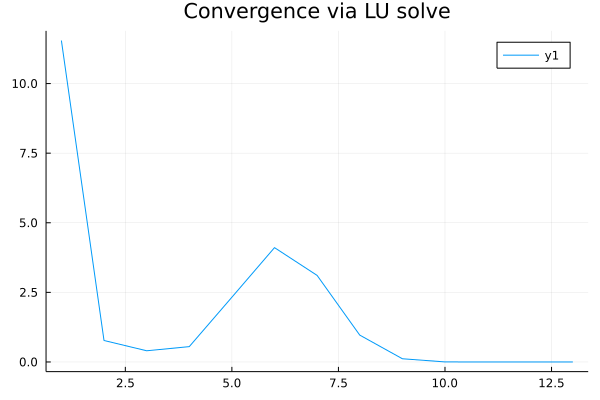

In [9]:
axis = collect(1:length(differences))
plot(axis, differences, title="Convergence via LU solve")

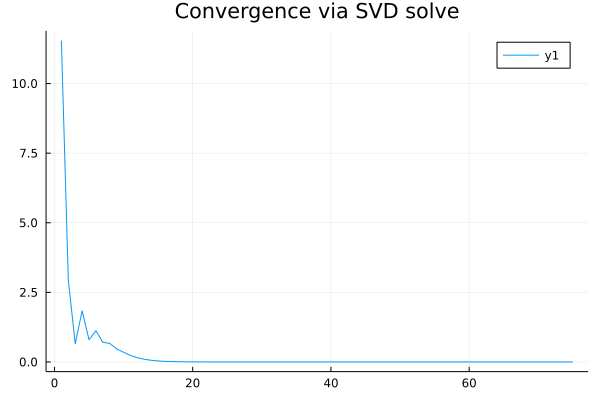

In [11]:
differences, β_k = irls(X, y, false)
axis = collect(1:length(differences))
plot(axis, differences, title="Convergence via SVD solve")

## Simulation Example

In [12]:
x_1 = sort(rand(100))
x_2 = sort(rand(100))
y = 0.137 .+ 0.674 .* x_1 + 2.9 .* x_2 + rand(Gamma(1,2),length(x_1))

X = [x_1 x_2]
DF = [y x_1 x_2]

df = DataFrame(DF,  [:y, :x_1, :x_2]);

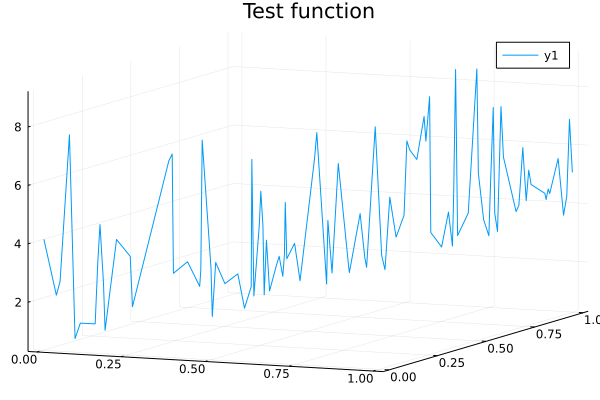

In [13]:
plot(x_1, x_2, y, title="Test function")

In [14]:
gm1 = fit(GeneralizedLinearModel, @formula(y ~ x_1 + x_2), df, Gamma())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Gamma{Float64}, InverseLink}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_1 + x_2

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   0.367435   0.0383954   9.57    <1e-20   0.292181   0.442689
x_1          -0.3565     0.315467   -1.13    0.2584  -0.974803   0.261803
x_2           0.174503   0.304049    0.57    0.5660  -0.421423   0.770429
─────────────────────────────────────────────────────────────────────────

In [15]:
include("glm_impl.jl");

_, test_coeffs = _irls(X, y, true, "gamma", [0.3753328166446351; 0.13051650978446772;  -0.34019083968643465])
test_coeffs

LoadError: MethodError: no method matching iterate(::Nothing)
[0mClosest candidates are:
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/range.jl:826
[0m  iterate([91m::Union{LinRange, StepRangeLen}[39m, [91m::Integer[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/range.jl:826
[0m  iterate([91m::T[39m) where T<:Union{Base.KeySet{<:Any, <:Dict}, Base.ValueIterator{<:Dict}} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/dict.jl:695
[0m  ...

## Civil War Example

In [17]:
df = load("../civil_wars.RData", convert=true)["x"];
df = dropmissing(df);

y = df[:, "battledeadbest"] 
# y = (y + randn(length(y))) / 500
y = (y + randn(length(y))) / 10000;

In [35]:

# X = Matrix(df[:, filter(x -> x ∈ ["relfrac", "pop", "gdpsq", "duration"], names(df))]);
X = Matrix(df[:, filter(x -> x ∈ ["relfrac", "duration", "pop", "gdpsq"], names(df))]);

n, p = size(X)
for i in 1:p
  X[:, i] = (X[:, i] .- minimum(X[:,i])) ./ (maximum(X[:, i]) - minimum(X[:, i]));
end

_, glm_coeffs, ϕ_est, w_k = _irls(X, y, true, "gamma", true);
glm_coeffs

ϕ_estimate is: 1281.1944166952574


5-element Vector{Float64}:
  0.1326587514804686
 -0.10742626660233967
 -0.17166641922085474
  0.02995088918823528
  0.13228293630956062

In [43]:
include("glm_impl.jl");

pred_points = collect((1:100) / 100)

f_0 = repeat([1], length(pred_points))
f1 = repeat([quantile(X[:, 1], 0.50)], length(pred_points))
f2 = repeat([quantile(X[:, 2], 0.50)], length(pred_points))
f3 = repeat([quantile(X[:, 3], 0.50)], length(pred_points))
f4 = repeat([quantile(X[:, 4], 0.50)], length(pred_points))

war_len_X = [f_0 pred_points f2 f3 f4]
# warlen_results = exp.(war_len_X * glm_coeffs) .* 10000;

warlen_results = exp.(war_len_X * glm_coeffs) .* 10000;
μ_lower, μ_upper = _pred_intervals(x -> 1 / x, X, w_k, glm_coeffs, ϕ_est);

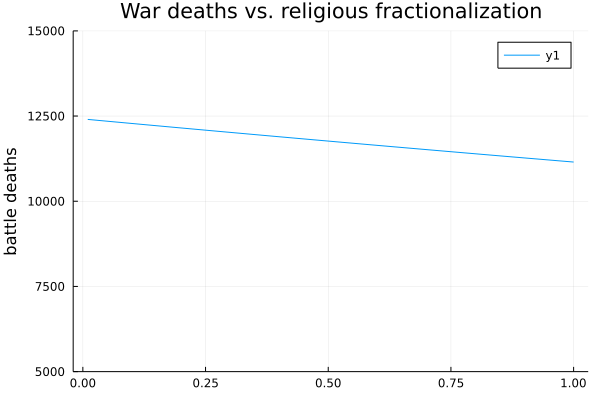

In [44]:
plot_ref = plot(pred_points, warlen_results, title="War deaths vs. religious fractionalization", ylims=(5000,15000),  ylabel="battle deaths")
savefig(plot_ref, "../Visualizations/civil_wars/glm_deaths_vs_relfrac.pdf")
plot_ref

In [41]:
feature2 = [f_0 f1 pred_points f3 f4]

feature2_results = exp.(feature2 * glm_coeffs) .* 10000;

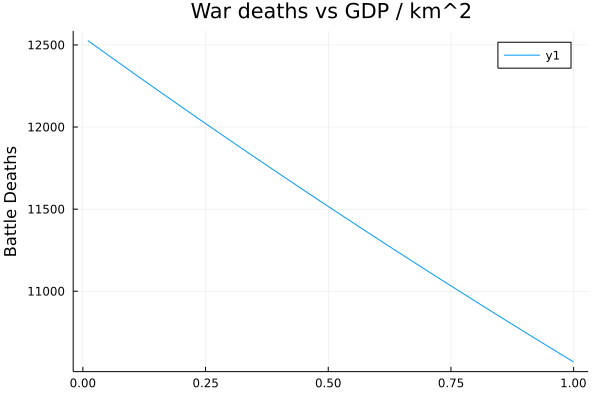

In [42]:
plot_ref = plot(pred_points, feature2_results, title="War deaths vs GDP / km^2", ylabel="Battle Deaths")
savefig(plot_ref, "../Visualizations/civil_wars/deaths_vs_gdp.pdf")
plot_ref

In [47]:
feature3 = [f_0 f1 f2 pred_points f4]

feature3_results = exp.(feature3 * glm_coeffs) .* 10000;

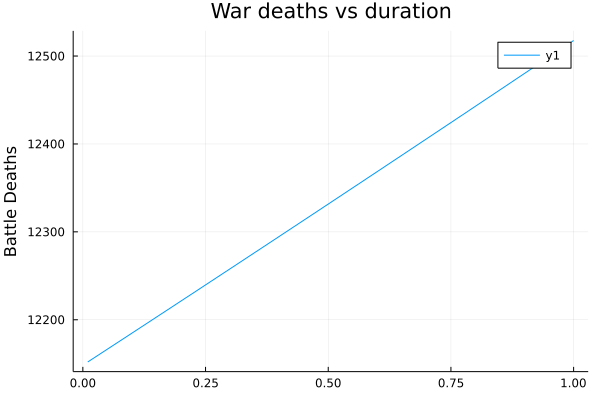

In [49]:
plot_ref = plot(pred_points, feature3_results, title="War deaths vs duration", ylabel="Battle Deaths")
plot_ref